In [1]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

# Bank Marketing Data Importing

In [ ]:
import pandas as pd
bank_data=pd.read_csv("datasets/bank-full.csv")
print(bank_data.shape)


In [ ]:
bank_data.columns

In [ ]:
import pandas as pd
bank_data=pd.read_csv("datasets/bank-full.csv",sep=';')
print(bank_data.shape)

In [ ]:
bank_data.head()

In [ ]:
bank_data.info()

# Continuous variable distributions

## Box Plots (Box plot is used to find the outliers in the data )

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(bank_data["balance"]) # box plot its compressed means there are outliers in the data

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(bank_data["age"])

In [ ]:
plt.boxplot(bank_data["age"], whis= 2) # whis is the whisker length which is 1.5 by default and can be changed to 2 or 3 
# to get more outliers 1.5 is the default value , 75 % + 1.5 * IQR ,above this value is considered as suggested outliers

## Vilon Plots

In [ ]:
import seaborn as sns
sns.violinplot(y=bank_data["balance"])

In [ ]:
sns.violinplot(y=bank_data["age"])

## Histograms

In [ ]:
import seaborn as sns
sns.histplot(bank_data["age"],kde=True)

In [ ]:
import seaborn as sns
sns.histplot(bank_data["age"],kde=False)

In [ ]:
import seaborn as sns
sns.histplot(bank_data["balance"])

In [ ]:
numeric_cols=[col for col in bank_data.columns if bank_data[col].dtypes in ["int64","float64"]]
print(numeric_cols)

In [ ]:
plt.figure()
for col in numeric_cols:
  sns.histplot(bank_data[col])
  plt.title([col + " Histogram"])
  plt.show()


# Rossmann Store Sales Data

Dataset : https://www.kaggle.com/c/rossmann-store-sales/data



* Id - an Id that represents a (Store, Date) duple within the test set
* Store - a unique Id for each store
* Sales - the turnover for any given day (this is what you are predicting)
* Customers - the number of customers on a given day
* Open - an indicator for whether the store was open: 0 = closed, 1 = open
* StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* StoreType - differentiates between 4 different store models: a, b, c, d
* Assortment - describes an assortment level: a = basic, b = extra, c = extended
* CompetitionDistance - distance in meters to the nearest competitor store
* CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* Promo - indicates whether a store is running a promo on that day
* Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store




In [ ]:
sales_data=pd.read_csv("datasets/Rossmann_Store_Sales.csv")
print(sales_data.shape)
print(sales_data.info())
sales_data.sample(5)

These all box plot,violin, histogram will tell us whether outlier is der or not but it will not tell us what percentage of outlier is der, then we will go for percintile calculation

In [ ]:
#Sales
plt.boxplot(sales_data["Sales"])
plt.show()
sns.violinplot(y=sales_data["Sales"])
plt.show()
sns.histplot(sales_data["Sales"])
plt.show()
sns.histplot(sales_data["Sales"],kde=True)
plt.show()

In [ ]:
# Customers
plt.boxplot(sales_data["Customers"])
plt.show()
sns.violinplot(y=sales_data["Customers"])
plt.show()
sns.histplot(sales_data["Customers"])
plt.show()
sns.histplot(sales_data["Customers"],kde=True)
plt.show()

# Categorical Variables Summary

## Bar Charts

In [ ]:
plt.figure()
sns.countplot(x="job",  data=bank_data)

In [ ]:
plt.figure()
sns.countplot(y="job",  data=bank_data)

In [ ]:
categorical_cols=[col for col in bank_data.columns if bank_data[col].dtypes in ["object"]]
print(categorical_cols)

In [ ]:
plt.figure()
for col in categorical_cols:
  sns.countplot(y=col,  data=bank_data)
  plt.title([col + " Bar plot"])
  plt.show()


# Rossmann Store Sales

In [6]:
sales_data=pd.read_csv("datasets/Rossmann_Store_Sales.csv")

In [ ]:
import seaborn as sns
sns.countplot(x="StoreType", data=sales_data)

In [ ]:
sns.countplot(x="Assortment",  data=sales_data)

In [ ]:
sales_data.columns

# Continuous(X) vs Continuous(Y)

### Correlation when we are checking between two continuos variables
### when we are looking for multivariate analysis between continous values we will go for P value
### the relation is vizualised using scatter plot , quntified using correlation coffiicent

In [ ]:
import numpy as np
np.corrcoef(bank_data["age"],bank_data["balance"])

## Scatter Plots

In [ ]:
bank_data.columns

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x="age", y="balance", data=bank_data)

In [ ]:
sns.scatterplot(x="age", y="balance", hue="y", data=bank_data)

In [ ]:
sns.scatterplot(x="age", y="balance", hue="y", data=bank_data[bank_data["balance"]<20000])

# Rossmann Store Sales

In [ ]:
#Sales vs Customers
sns.scatterplot(y="Sales", x="Customers", data=sales_data)

In [ ]:
np.corrcoef(sales_data["Sales"],sales_data["Customers"])

In [ ]:
#Sales vs CompetitionDistance
sns.scatterplot(y="Sales", x="CompetitionDistance", data=sales_data)

In [ ]:
np.corrcoef(sales_data["Sales"],sales_data["CompetitionDistance"])

# Continuous(X) vs Categorical (Y)

## Visualization options

### Bank Marketing Data

In [27]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

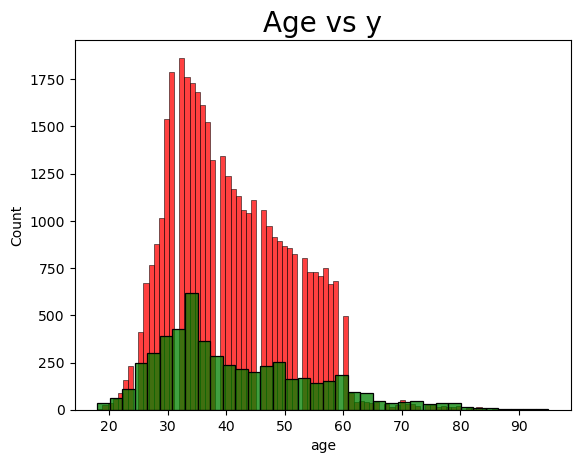

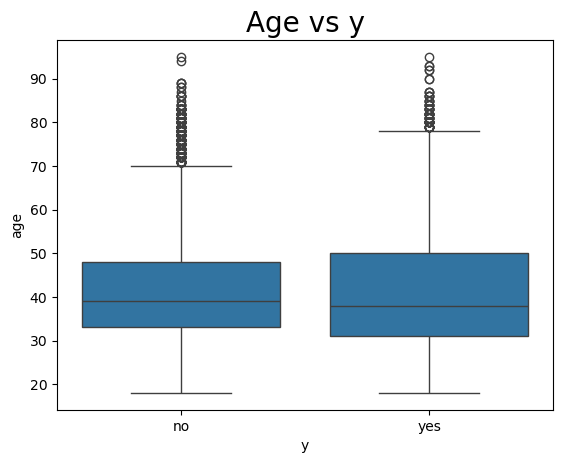

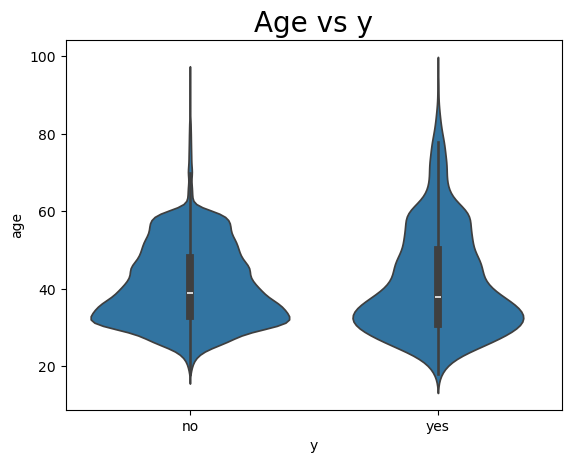

In [26]:
#Histogram Overlay
sns.histplot(bank_data[bank_data["y"]=="no"]["age"], color="red")
sns.histplot(bank_data[bank_data["y"]=="yes"]["age"], color="green")
plt.title('Age vs y', fontsize=20)
plt.show()

#Box Plots for Continuous and Categories comparison
sns.boxplot( x=bank_data["y"], y=bank_data["age"])
plt.title('Age vs y', fontsize=20)
plt.show()

#Violin plots for Continuous and Categories comparison
sns.violinplot(x=bank_data["y"], y=bank_data["age"])
plt.title('Age vs y', fontsize=20)
plt.show()

### Credit Risk Data

In [28]:
credit_risk=pd.read_csv("datasets/Cleaned_cs_training.csv")
credit_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Sr_No                   150000 non-null  int64  
 1   SeriousDlqin2yrs        150000 non-null  int64  
 2   util_new                150000 non-null  float64
 3   age_new                 150000 non-null  int64  
 4   num_30_59_dpd_new       150000 non-null  int64  
 5   DebtRatio_new_ind       150000 non-null  int64  
 6   DebtRatio_new           150000 non-null  float64
 7   MonthlyIncome_ind       150000 non-null  int64  
 8   MonthlyIncome_new       150000 non-null  int64  
 9   Open_Credit_lines_new   150000 non-null  int64  
 10  num_90_dpd_new          150000 non-null  int64  
 11  Real_estate_loans_new   150000 non-null  int64  
 12  num_60_dpd_new          150000 non-null  int64  
 13  NumberOfDependents_new  150000 non-null  int64  
dtypes: float64(2), int64

In [31]:
credit_risk.sample(5)

,Sr_No,SeriousDlqin2yrs,util_new,age_new,num_30_59_dpd_new,DebtRatio_new_ind,DebtRatio_new,MonthlyIncome_ind,MonthlyIncome_new,Open_Credit_lines_new,num_90_dpd_new,Real_estate_loans_new,num_60_dpd_new,NumberOfDependents_new
143519,65828,1,0.979619,30,3,0,0.263828,1,3850,5,1,0,0,4
20876,36089,1,1.000000,38,0,0,0.031230,1,1600,2,2,0,0,0
73018,126058,0,0.149161,65,0,0,0.292842,1,6132,19,0,1,0,0
138290,87811,0,0.950839,53,0,0,0.327705,1,5803,7,1,1,0,3
37352,64701,0,0.000000,27,0,0,0.342492,1,2583,4,0,2,0,0


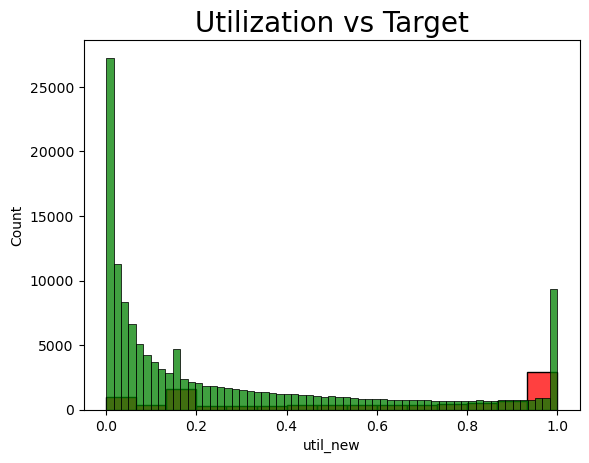

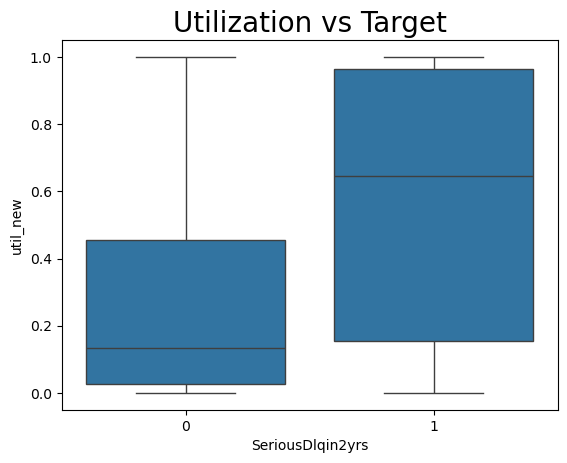

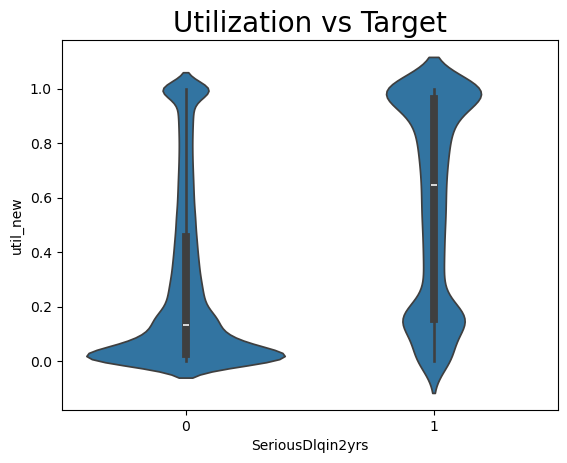

In [32]:
#Histogram Overlay
sns.histplot(credit_risk[credit_risk["SeriousDlqin2yrs"]==1]["util_new"], color="red")
sns.histplot(credit_risk[credit_risk["SeriousDlqin2yrs"]==0]["util_new"], color="green")
plt.title('Utilization vs Target', fontsize=20)
plt.show()

#Box Plots for Continuous and Categories comparison
sns.boxplot( x=credit_risk["SeriousDlqin2yrs"], y=credit_risk["util_new"])
plt.title('Utilization vs Target', fontsize=20)
plt.show()

#Violin plots for Continuous and Categories comparison
sns.violinplot(x=credit_risk["SeriousDlqin2yrs"], y=credit_risk["util_new"])
plt.title('Utilization vs Target', fontsize=20)
plt.show()



## WOE and Information Value

IV Function

In [ ]:
def iv_woe(data, target, bins=10, show_woe=False):

    import numpy as np

    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()

    #Extract Column Names
    cols = data.columns

    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})

        #Binning
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Class0']

        # % of Class 0 and Class 1
        d['% of Class0'] = np.maximum(d['Class0'], 0.5) / d['Class0'].sum()
        d['Class1'] = d['N'] - d['Class0']
        d['% of Class1'] = np.maximum(d['Class1'], 0.5) / d['Class1'].sum()

        # WOE and IV
        d['WoE'] = np.log(d['% of Class0']/d['% of Class1'])
        d['IV'] = d['WoE'] * (d['% of Class0'] - d['% of Class1'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)

    #return newDF, woeDF
    print("===================\n")
    print(newDF.sort_values(by="IV", ascending=False))

### IV on Bank Market Data

In [ ]:
bank_data.info()

In [ ]:
bank_data["y"].value_counts()
bank_data["y_num"]=bank_data["y"].map({"no":0, "yes":1})
bank_data["y_num"].value_counts()

In [ ]:
final_data=bank_data[["age","balance", "y_num"]]
iv_woe(data=final_data, target= "y_num")

### IV on Credit Risk Data

In [ ]:
final_data=credit_risk.drop(["Sr_No"], axis=1)
iv_woe(data=final_data, target= "SeriousDlqin2yrs")

## Information Gain  (IG)

In [ ]:
def IG_Cal(input_df, target_col):
  result_DF=pd.DataFrame()
  from sklearn import tree
  import matplotlib.pyplot as plt
  from sklearn.tree import plot_tree, export_text

  for col in input_df.drop(target_col, axis=1).columns.values:
    features= [col]
    X = input_df[features]
    y = input_df[target_col]
    DTree = tree.DecisionTreeClassifier(criterion="entropy" ,max_depth=1)
    DTree.fit(X,y)


    plot_tree(DTree, filled=True,
                     rounded=True,
                     impurity=True,
                     feature_names = features)
    plt.show()

    #Entropy and Information Gain
    entropy_array=DTree.tree_.impurity
    node_size=DTree.tree_.weighted_n_node_samples

    information_gain=entropy_array[0]-((node_size[1]/node_size[0])*entropy_array[1] + (node_size[2]/node_size[0])*entropy_array[2])
    print("Information_gain for the feature ", features, " is ", round(information_gain*100,3) , "%")

    temp =pd.DataFrame({"Variable" : [col], "IG" :[information_gain*100]}, columns = ["Variable", "IG"])
    result_DF=pd.concat([result_DF,temp], axis=0)

  print("===================\n")
  print(result_DF.sort_values(by="IG", ascending=False))

In [ ]:
final_data=bank_data[["age","balance", "y_num"]]
IG_Cal(final_data, "y_num")

In [ ]:
IG_Cal(credit_risk,'SeriousDlqin2yrs')

# Categorical(X) vs. Continuous (Y)

# Testing of Hypothesis

In [ ]:
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests

### Test for Single Mean

In [ ]:
sales_sample=sales_data.sample(n=100,random_state=55)

ztest ,pval = stests.ztest(sales_sample["Customers"], x2=None, value=700)
print(ztest)
print("P-Value", float(pval))

if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

### Test for Two Means

In [ ]:
sales_sample=sales_data.sample(n=100,random_state=55)

ztest ,pval = stests.ztest(sales_sample["Sales"][sales_sample["Promo"]==0],
                           sales_sample["Sales"][sales_sample["Promo"]==1])
print(ztest)
print("P-Value", float(pval))

if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

### Testing Multiple Means

In [ ]:
sales_sample=sales_data.sample(n=300,random_state=55)

F, p = stats.f_oneway(sales_sample["Sales"][sales_sample["StoreType"]=="c"],
                      sales_sample["Sales"][sales_sample["StoreType"]=="b"],
                      sales_sample["Sales"][sales_sample["StoreType"]=="c"],
                      sales_sample["Sales"][sales_sample["StoreType"]=="d"]
                      )
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")


In [ ]:
F, p = stats.f_oneway(sales_sample["Customers"][sales_sample["DayOfWeek"]==2],
                      sales_sample["Customers"][sales_sample["DayOfWeek"]==3],
                      sales_sample["Customers"][sales_sample["DayOfWeek"]==4])
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

## IG For Continuous Target

In [ ]:
def IG_Cal_Type2(input_df, target_col):
  result_DF=pd.DataFrame()
  from sklearn import tree
  import matplotlib.pyplot as plt
  from sklearn.tree import plot_tree, export_text

  for col in input_df.drop(target_col, axis=1).columns.values:
    features= [col]
    X = input_df[features]
    y = input_df[target_col]
    DTree = tree.DecisionTreeRegressor(criterion="mse" ,max_depth=1)
    DTree.fit(X,y)


    plot_tree(DTree, filled=True,
                     rounded=True,
                     impurity=True,
                     feature_names = features)
    plt.show()

    #MSE and Information Gain
    entropy_array=DTree.tree_.impurity
    node_size=DTree.tree_.weighted_n_node_samples

    information_gain=(entropy_array[0]-((node_size[1]/node_size[0])*entropy_array[1] + (node_size[2]/node_size[0])*entropy_array[2]))/entropy_array[0]
    print("Information_gain for the feature ", features, " is ", information_gain*100 )

    temp =pd.DataFrame({"Variable" : [col], "IG" :[information_gain*100]}, columns = ["Variable", "IG"])
    result_DF=pd.concat([result_DF,temp], axis=0)

  print("===================\n")
  print(result_DF.sort_values(by="IG", ascending=False))

Rossmann Store Sales Data

In [ ]:
final_data=sales_data[["Promo",	"SchoolHoliday","DayOfWeek", "Sales"]]
IG_Cal_Type2(input_df=final_data, target_col="Sales")

# Categorical(X) vs Categorical(Y)

## Bar Chart for categorical variable comparison

In [ ]:
sns.countplot(y="education",  data=bank_data[bank_data["y"]=="no"], color="red")
sns.countplot(y="education",  data=bank_data[bank_data["y"]=="yes"], color="green")

In [ ]:
plt.figure()
for col in categorical_cols:
  sns.countplot(y=col,  data=bank_data[bank_data["y"]=="no"], color="red")
  sns.countplot(y=col,  data=bank_data[bank_data["y"]=="yes"], color="green")
  plt.title([col + " Bar plot"])
  plt.show()


In [ ]:
plt.figure()
for col in categorical_cols:
  sns.countplot(y=col,  data=bank_data,hue="y")
  plt.title([col + " Bar plot"])
  plt.show()

## Cross Tables

In [ ]:
for col in categorical_cols:
  print(pd.crosstab(bank_data[col], bank_data['y']))

In [ ]:
for col in categorical_cols:
  print(pd.crosstab(bank_data[col], bank_data['y'], margins=True))
  print("============================\n")

## Chi-Square Test of Independence

In [ ]:
bank_data_sample=bank_data.sample(300)
import scipy.stats as stats

for col in categorical_cols:
  crosstab =pd.crosstab(bank_data_sample[col], bank_data_sample['y'])
  print(crosstab)
  Chi=stats.chi2_contingency(crosstab)
  p=Chi[1]
  print("p-value for significance is: ",p )
  if p<0.05:
    print("reject null hypothesis")
  else:
    print("accept null hypothesis")
  print("============================\n")

## IG For Categorical Target

In [ ]:
bank_data["y_num"]=bank_data["y"].map({"no":0, "yes":1})
bank_data["housing_num"]=bank_data["housing"].map({"no":0, "yes":1})
bank_data["loan_num"]=bank_data["loan"].map({"no":0, "yes":1})

In [ ]:
final_data=bank_data[["loan_num","housing_num", "y_num"]]
IG_Cal(final_data, "y_num")

# Multivariate Effect Detection

In [ ]:
def Multi_level_Tree(input_df, target_col, levels):
  from sklearn import tree
  import matplotlib.pyplot as plt
  from sklearn.tree import plot_tree, export_text

  features= input_df.drop(target_col, axis=1).columns.values
  X = input_df[features]
  y = input_df[target_col]
  DTree = tree.DecisionTreeClassifier(criterion="entropy" ,max_depth=levels)
  DTree.fit(X,y)
  plt.figure(figsize=(15,7))
  plot_tree(DTree, filled=True,
                    rounded=True,
                    impurity=True,
                    feature_names = features)
  plt.show()
  print([[i, features[i]] for i in range(len(features))])
  print(export_text(DTree))

In [ ]:
Multi_level_Tree(input_df=credit_risk, target_col="SeriousDlqin2yrs", levels=2)

In [ ]:
Multi_level_Tree(input_df=credit_risk, target_col="SeriousDlqin2yrs", levels=3)

## Multivariate Interaction Effect for Regression

In [ ]:
def Multi_level_Tree_Reg(input_df, target_col, levels):
  from sklearn import tree
  import matplotlib.pyplot as plt
  from sklearn.tree import plot_tree, export_text

  features= input_df.drop(target_col, axis=1).columns.values
  X = input_df[features]
  y = input_df[target_col]
  DTree = tree.DecisionTreeRegressor(criterion="mse" ,max_depth=levels)
  DTree.fit(X,y)
  plt.figure(figsize=(15,7))
  plot_tree(DTree, filled=True,
                    rounded=True,
                    impurity=True,
                    feature_names = features)
  plt.show()
  print([[i, features[i]] for i in range(len(features))])
  print(export_text(DTree))

In [ ]:
sales_data.info()

In [ ]:
final_data=sales_data[["Promo",	"SchoolHoliday","DayOfWeek", "Sales","CompetitionDistance","Promo2"]]
Multi_level_Tree_Reg(input_df=final_data, target_col="Sales",levels=2)